## Resimi Okuma ve Gösterme

(768, 1366, 3)


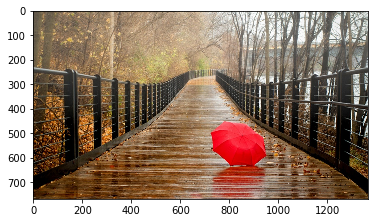

In [31]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

resim=cv2.imread("Yağmurlu-Manzara-resmi.jpg")
#OpenCV resimi BGR olarak okuyor bu yüzden resimi RGB ye çeviriyoruz.
resim=cv2.cvtColor(resim,cv2.COLOR_BGR2RGB)

plt.imshow(resim)
print(resim.shape)

## HSV Renk Uzayı

**H**ue, **S**aturation, **V**alue

**Hue**: Modelin renk kısmı

**Saturation**: Renkteki gri miktarı tanımlar.

**Value**: Saturation ile çalışır ve rengin parlaklığını ve doygunluğunu tanımlar.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/HSV_color_solid_cylinder_saturation_gray.png/197px-HSV_color_solid_cylinder_saturation_gray.png)

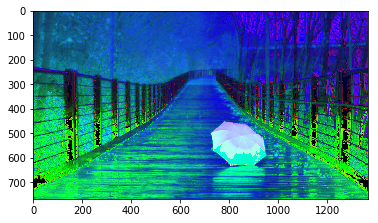

In [15]:
resim_hsv=cv2.cvtColor(resim,cv2.COLOR_RGB2HSV)
plt.imshow(resim_hsv)

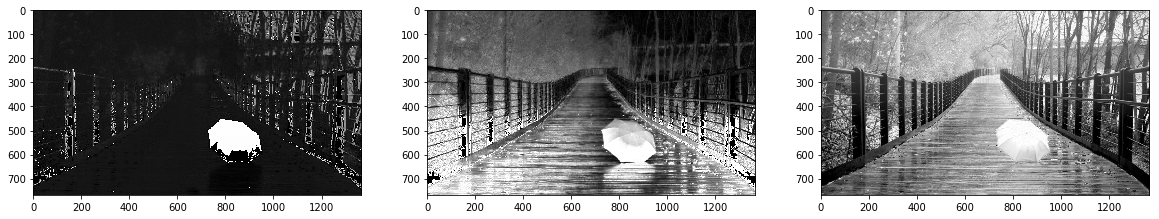

In [20]:
h=resim_hsv[:,:,0]
s=resim_hsv[:,:,1]
v=resim_hsv[:,:,2]

f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,10))
ax1.imshow(h,cmap="gray")
ax2.imshow(s,cmap="gray")
ax3.imshow(v,cmap="gray")

## Maskeleme

[OpenCV Kaynak](https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html)

**Seçim Eşiği Oluşturma**

In [0]:
alt_hue=np.array([160,0,0])
üst_hue=np.array([180,255,255])

**Maske Uygulama**

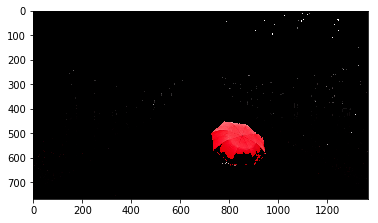

In [30]:
maske=cv2.inRange(resim_hsv,alt_hue,üst_hue)

maskeli_resim=np.copy(resim)
maskeli_resim[maske==0]=[0,0,0]
plt.imshow(maskeli_resim)

## Parlaklık Bulma ve Sınıflandırma

In [0]:
def hesap(resim_hsv):
  parlaklık=np.sum(resim_hsv[:,:,2])
  resim_alanı=resim_hsv.shape[0]*resim_hsv.shape[1]
  ortalama=parlaklık/resim_alanı
  return ortalama

In [42]:
eşik=100 #Gündüz yada Gece olduğunu belirlemek için Eşik değeri Tanımladık.
tahmin="Gece"
if hesap(resim_hsv)>eşik:
  tahmin="Gündüz"
print(tahmin)

Gündüz
